In [42]:
import pandas as pd 
import numpy as np 
import os, sys

In [66]:
data = pd.read_csv('refined-data.csv')
data.columns

Index(['FeatureEnviro', 'Enviro 1', 'Enviro 2', 'Enviro 3', 'Enviro 4',
       'FeatureGender', 'FeatureRate', 'FeatureMarried', 'FeatureRelationship',
       'Relationship1', 'Relationship2', 'Relationship3', 'Relationship4',
       'FeatureStock', 'FeatureBalance', 'WorkLife1', 'WorkLife2', 'WorkLife3',
       'WorkLife4', 'FeatureEnvironment', 'EnvironmentSatisfaction',
       'EnvironmentSatisfaction2'],
      dtype='object')

In [78]:
# drop anything not properly featurized
data = data.drop([column for column in data.columns if 'Feature' not in column], axis=1)
data.columns

Index(['FeatureEnviro', 'FeatureGender', 'FeatureRate', 'FeatureMarried',
       'FeatureRelationship', 'FeatureStock', 'FeatureBalance',
       'FeatureEnvironment'],
      dtype='object')

In [89]:
features = data.drop(['FeatureEnvironment'], axis=1)
targets = data['FeatureEnvironment']
X = features.values
Y = targets.values

**Only run the below if you're a dangerous individual**

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)
from keras.utils import to_categorical
Y = to_categorical(targets)

# Get rekt

In [103]:
#Split training data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 7)

In [104]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [132]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(72, activation='tanh'))
model.add(Dense(Y.shape[1], activation='tanh'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
epochs = model.fit(X_train, Y_train, batch_size=128, epochs=500, validation_split=0.25, shuffle=True)

Train on 826 samples, validate on 276 samples
Epoch 1/500
826/826 [==============================] - 0s 494us/step - loss: 2.7083 - acc: 0.7530 - val_loss: 0.8821 - val_acc: 0.6775
Epoch 2/500
826/826 [==============================] - 0s 20us/step - loss: 0.9757 - acc: 0.6283 - val_loss: 0.7969 - val_acc: 0.5652
Epoch 3/500
826/826 [==============================] - 0s 20us/step - loss: 1.1523 - acc: 0.4855 - val_loss: 0.8697 - val_acc: 0.4022
Epoch 4/500
826/826 [==============================] - 0s 20us/step - loss: 1.1893 - acc: 0.3208 - val_loss: 0.6688 - val_acc: 0.1159
Epoch 5/500
826/826 [==============================] - 0s 23us/step - loss: 0.5700 - acc: 0.0920 - val_loss: 0.3356 - val_acc: 0.0471
Epoch 6/500
826/826 [==============================] - 0s 22us/step - loss: 0.6693 - acc: 0.0351 - val_loss: 0.7193 - val_acc: 0.0109
Epoch 7/500
826/826 [==============================] - 0s 23us/step - loss: 1.1045 - acc: 0.0036 - val_loss: 1.2040 - val_acc: 0.0000e+00
Epoch 8/500

Epoch 60/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 61/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 62/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 63/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 64/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 65/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 66/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 118/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 119/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 120/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 121/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 122/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 123/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 

826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 174/500
826/826 [==============================] - 0s 21us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 175/500
826/826 [==============================] - 0s 21us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 176/500
826/826 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - 0s 21us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 177/500
826/826 [==============================] - 0s 23us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 178/500
826/826 [==============================] - 0s 23us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 179/500
826/826 [==============================] - 0s 23us/step - loss: 1.1921e-07 - acc: 1.0000 - val

826/826 [==============================] - 0s 21us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 230/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 231/500
826/826 [==============================] - 0s 21us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 232/500
826/826 [==============================] - 0s 17us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 233/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 234/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 235/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 

Epoch 286/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 287/500
826/826 [==============================] - 0s 21us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 288/500
826/826 [==============================] - 0s 17us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 289/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 290/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 291/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 292/500
826/826 [==============================] - 0s 17us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc:

826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 343/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 344/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 345/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 346/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 347/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 348/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 

Epoch 399/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 400/500
826/826 [==============================] - 0s 22us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 401/500
826/826 [==============================] - 0s 22us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 402/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 403/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 404/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 405/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc:

Epoch 456/500
826/826 [==============================] - 0s 17us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 457/500
826/826 [==============================] - 0s 17us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 458/500
826/826 [==============================] - 0s 17us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 459/500
826/826 [==============================] - 0s 18us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 460/500
826/826 [==============================] - 0s 19us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 461/500
826/826 [==============================] - 0s 20us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 462/500
826/826 [==============================] - 0s 17us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc:

In [135]:
model.evaluate(X_test, Y_test, batch_size=128)

368/368 [==============================] - 0s 11us/step


[0.0003913326907660002, 1.0]

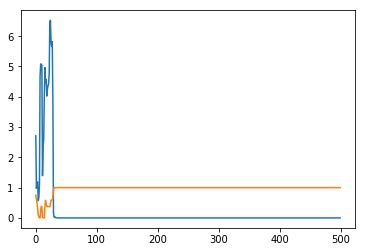

In [136]:
loss = epochs.history['loss']
acc = epochs.history['acc']
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(loss)), loss)
plt.plot(range(len(acc)), acc)

In [137]:
model.save('perfect.hd5')

In [138]:
u_model = Sequential()
u_model.add(Dense(32, input_shape=(X.shape[1],)))
u_model.add(Dense(16, activation='tanh'))
u_model.add(Dense(8, activation='tanh'))
u_model.add(Dense(72, activation='tanh'))
u_model.add(Dense(Y.shape[1], activation='tanh'))
u_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
u_epochs = u_model.fit(X_train, Y_train, batch_size=128, epochs=500, validation_split=0.25, shuffle=True)
u_model.evaluate(X_test, Y_test, batch_size=128)

Train on 826 samples, validate on 276 samples
Epoch 1/500
826/826 [==============================] - 0s 551us/step - loss: 1.2562 - acc: 0.5860 - val_loss: 1.1867 - val_acc: 0.7065
Epoch 2/500
826/826 [==============================] - 0s 21us/step - loss: 1.1548 - acc: 0.6029 - val_loss: 1.3271 - val_acc: 0.6522
Epoch 3/500
826/826 [==============================] - 0s 20us/step - loss: 1.2157 - acc: 0.6308 - val_loss: 1.2601 - val_acc: 0.6486
Epoch 4/500
826/826 [==============================] - 0s 25us/step - loss: 1.1215 - acc: 0.5617 - val_loss: 0.8954 - val_acc: 0.4565
Epoch 5/500
826/826 [==============================] - 0s 25us/step - loss: 1.1122 - acc: 0.4370 - val_loss: 1.6717 - val_acc: 0.3333
Epoch 6/500
826/826 [==============================] - 0s 25us/step - loss: 1.3312 - acc: 0.3995 - val_loss: 1.1647 - val_acc: 0.4130
Epoch 7/500
826/826 [==============================] - 0s 26us/step - loss: 0.8785 - acc: 0.4455 - val_loss: 0.9216 - val_acc: 0.4855
Epoch 8/500
826

826/826 [==============================] - 0s 19us/step - loss: 0.8115 - acc: 0.4939 - val_loss: 0.8126 - val_acc: 0.4964
Epoch 62/500
826/826 [==============================] - 0s 20us/step - loss: 0.7930 - acc: 0.5145 - val_loss: 0.9753 - val_acc: 0.5290
Epoch 63/500
826/826 [==============================] - 0s 20us/step - loss: 0.7671 - acc: 0.5823 - val_loss: 0.8617 - val_acc: 0.6123
Epoch 64/500
826/826 [==============================] - 0s 20us/step - loss: 0.7437 - acc: 0.6041 - val_loss: 0.8081 - val_acc: 0.6341
Epoch 65/500
826/826 [==============================] - 0s 19us/step - loss: 0.8309 - acc: 0.6380 - val_loss: 1.1886 - val_acc: 0.6775
Epoch 66/500
826/826 [==============================] - 0s 19us/step - loss: 0.8506 - acc: 0.6441 - val_loss: 0.7531 - val_acc: 0.6304
Epoch 67/500
826/826 [==============================] - 0s 19us/step - loss: 0.7819 - acc: 0.5896 - val_loss: 0.6863 - val_acc: 0.5688
Epoch 68/500
826/826 [==============================] - 0s 18us/step

826/826 [==============================] - 0s 19us/step - loss: 0.9468 - acc: 0.4467 - val_loss: 1.1697 - val_acc: 0.3297
Epoch 122/500
826/826 [==============================] - 0s 20us/step - loss: 1.4280 - acc: 0.4649 - val_loss: 1.3420 - val_acc: 0.4493
Epoch 123/500
826/826 [==============================] - 0s 20us/step - loss: 1.4930 - acc: 0.4976 - val_loss: 1.3289 - val_acc: 0.4601
Epoch 124/500
826/826 [==============================] - 0s 20us/step - loss: 1.4731 - acc: 0.5169 - val_loss: 0.9148 - val_acc: 0.4239
Epoch 125/500
826/826 [==============================] - 0s 18us/step - loss: 0.8840 - acc: 0.4685 - val_loss: 0.7214 - val_acc: 0.4167
Epoch 126/500
826/826 [==============================] - 0s 19us/step - loss: 0.7834 - acc: 0.4758 - val_loss: 0.7485 - val_acc: 0.4203
Epoch 127/500
826/826 [==============================] - 0s 17us/step - loss: 0.9060 - acc: 0.4794 - val_loss: 1.3713 - val_acc: 0.4275
Epoch 128/500
826/826 [==============================] - 0s 19

826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 182/500
826/826 [==============================] - 0s 22us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 183/500
826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 184/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 185/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 186/500
826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 187/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 188/500
826/826 [==============================] - 0s 18

826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 242/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 243/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 244/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 245/500
826/826 [==============================] - 0s 18us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 246/500
826/826 [==============================] - 0s 18us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 247/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 248/500
826/826 [==============================] - 0s 21

826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 302/500
826/826 [==============================] - ETA: 0s - loss: 4.7851 - acc: 0.132 - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 303/500
826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 304/500
826/826 [==============================] - 0s 15us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 305/500
826/826 [==============================] - 0s 18us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 306/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 307/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 308/500
826/826 [=

Epoch 361/500
826/826 [==============================] - 0s 21us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 362/500
826/826 [==============================] - 0s 23us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 363/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 364/500
826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 365/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 366/500
826/826 [==============================] - 0s 18us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 367/500
826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 368/500
826/826 [=========================

826/826 [==============================] - 0s 18us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 421/500
826/826 [==============================] - 0s 21us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 422/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 423/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 424/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 425/500
826/826 [==============================] - 0s 18us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 426/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 427/500
826/826 [==============================] - 0s 19

Epoch 480/500
826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 481/500
826/826 [==============================] - 0s 20us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 482/500
826/826 [==============================] - 0s 17us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 483/500
826/826 [==============================] - 0s 17us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 484/500
826/826 [==============================] - 0s 18us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 485/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 486/500
826/826 [==============================] - 0s 19us/step - loss: 4.5661 - acc: 0.1586 - val_loss: 4.5551 - val_acc: 0.1594
Epoch 487/500
826/826 [=========================

[4.293034947436789, 0.14945652368276016]

In [140]:
Y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])